In [4]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
data = pd.read_csv('Titanic-Dataset.csv')

In [5]:
# Preprossing the dataset

print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
# Handle missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Dropping irrelevant columns
data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)

# Filling missing values for 'Age' column with median values
data['Age'].fillna(data['Age'].median(), inplace=True)

# Encode categorical variables (Sex)
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

print(data.info())
print(data.head(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500


In [12]:
# Preparing features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Evaluate models

models = {'Logistic Regression': logistic_predictions, 'Random Forest': rf_predictions, 'Decision Tree': tree_predictions}
for name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    
    print(f"{name} Accuracy: {accuracy*100:.2f}%")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, predictions))


Logistic Regression Accuracy: 81.01%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Accuracy: 79.89%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Decision Tree Accuracy: 75.42%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       105
           1       0.

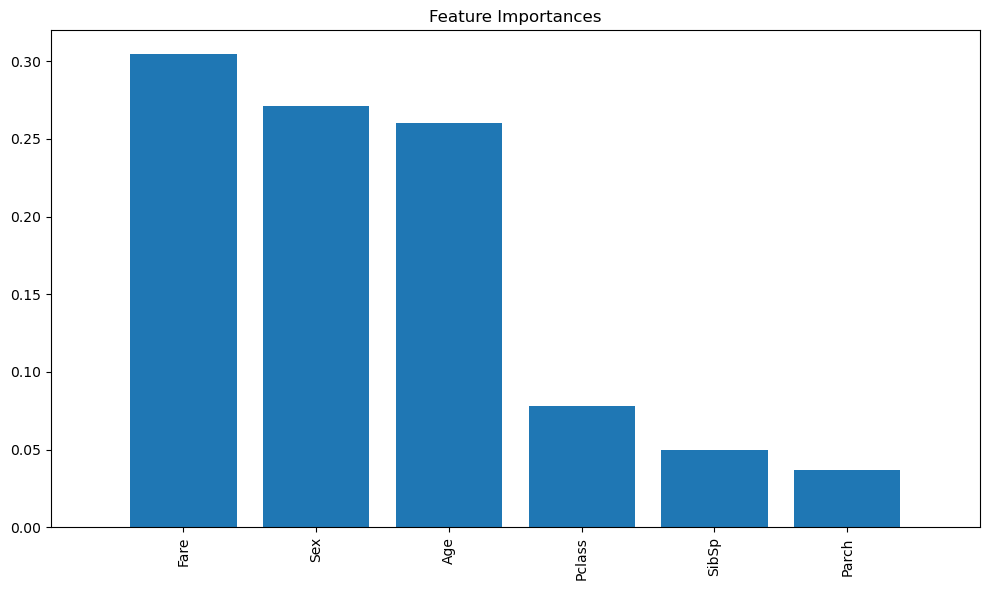

In [19]:
# Feature importance to retrieve the importance of each feature in the dataset
feature_importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Plotting Feature Importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('Feature-importances.png', bbox_inches='tight')
plt.show()

VISUALIZATION - Feature the analyses

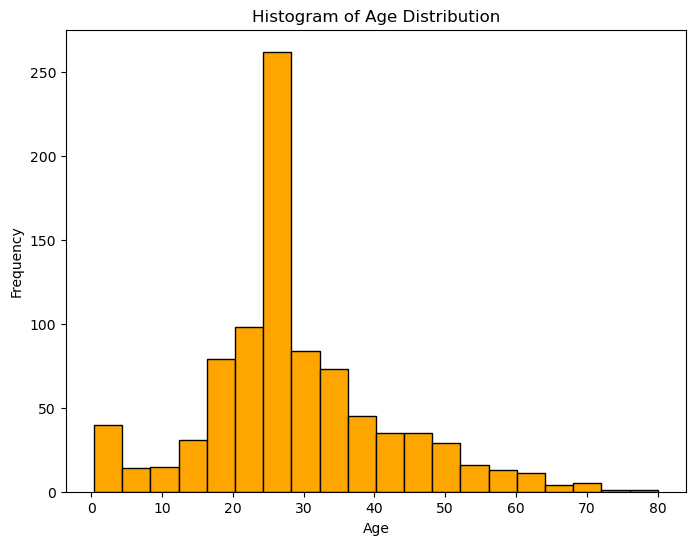

In [22]:
# Histogram of 'Age' distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.savefig('Age-distribution.png', bbox_inches='tight')
plt.show()

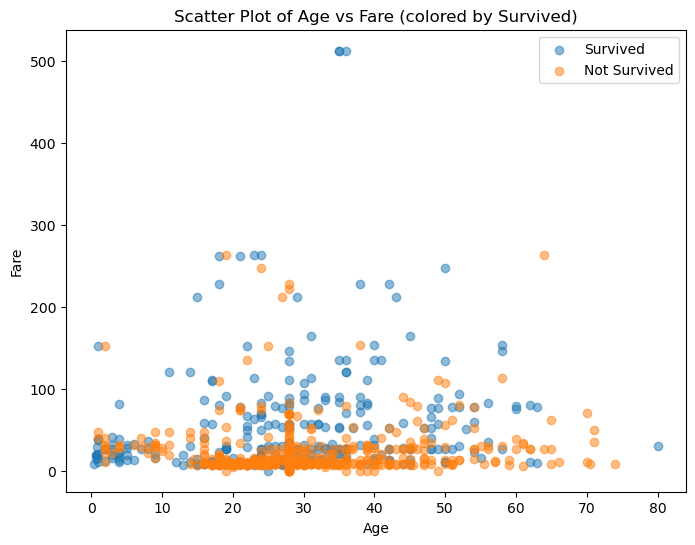

In [24]:
# Scatter plot between 'Age' and 'Fare' colored by 'Survived'
plt.figure(figsize=(8, 6))
plt.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], label='Survived', alpha=0.5)
plt.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], label='Not Survived', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare (colored by Survived)')
plt.legend()
plt.savefig('age-vs-fare.png', bbox_inches='tight')
plt.show()

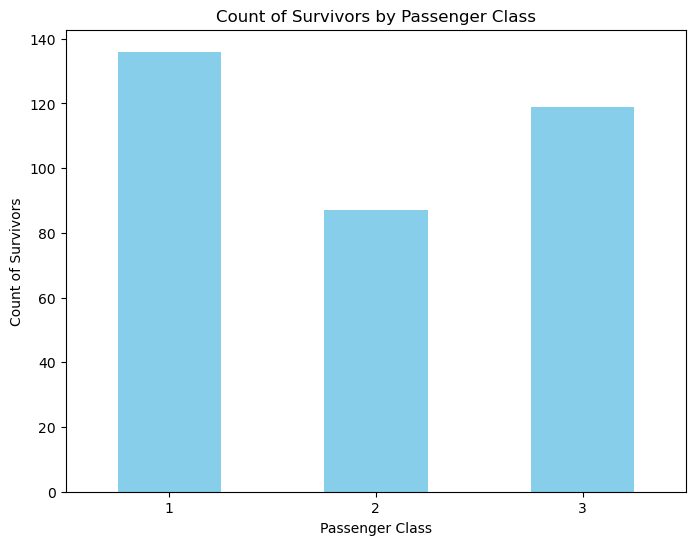

In [26]:
# Bar plot showing the count of survivors by 'Pclass'
survivors_by_class = data.groupby('Pclass')['Survived'].sum()
plt.figure(figsize=(8, 6))
survivors_by_class.plot(kind='bar', color='skyblue')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Survivors')
plt.title('Count of Survivors by Passenger Class')
plt.xticks(rotation=0)
plt.savefig('pclass-survivor.png', bbox_inches='tight')
plt.show()

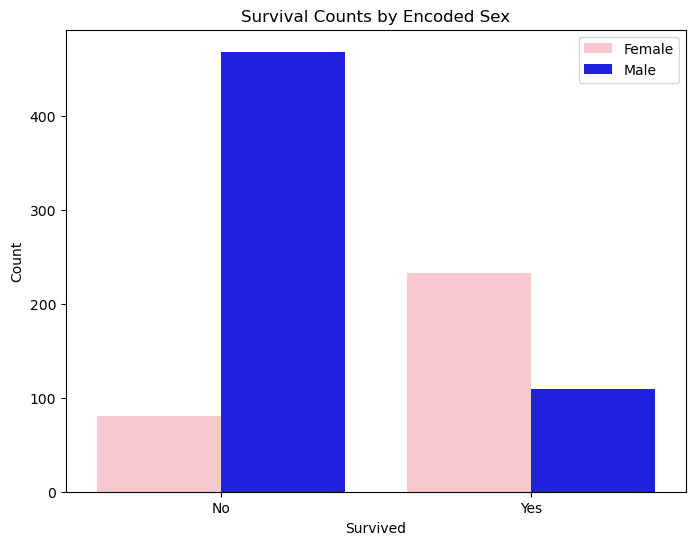

In [28]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=data, palette={0: 'pink', 1: 'blue'})  # Assuming 0 is Female and 1 is Male
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts by Encoded Sex')
plt.legend(['Female', 'Male'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.savefig('Survival-count-by-sex.png', bbox_inches='tight')
plt.show()